In [ ]:
# IMPORT PYTHON LIBRARIES

#Importamos la slibrerías para hacer el EDA
import numpy as np
import pandas as pd

#Importo librería sys para añadir un 'path' a todo lo que escribamos.
#Es decir, para poder llamar a archivos de otras carpetas
import sys 
sys.path.append("..")

#Después importamos el archivo de funciones ('sp_limpieza.py') gracias a 'sys'
import src.sp_limpieza as sp
#Importamos importlib para poder recargar el módulo y reflejar los cambios actualizados
import importlib  
importlib.reload(sp) 

#Importamos funciones para interactuar con el sistema operativo
import os


#Librerías visualización de gráficos
import matplotlib.pyplot as plt
import seaborn as sns


#Visualizar todas las columnas
pd.set_option('display.max_columns', None)

# 1. Transformación y limpieza de datos

### 1.1. Importación y visión general de los datos

In [ ]:
# LEER EL DATASET (bank information)

#Cargamos el primer archivo dentro de un dataframe le quitamos la columna 'Unnamed'
df_bank = pd.read_csv(r"data\original_data\bank-additional.csv", index_col = 0)

In [ ]:
#Cargamos el segundo archivo dentro de un dataframe le quitamos la columna 'Unnamed'
df_customer = pd.read_excel(r"data\original_data\customer-details.xlsx", index_col= 0)

In [489]:
#Importamos la información general del dataset 'df_bank'

sp.eda_preliminar(df_bank)

#INFO
    # Aquí se pueden ver los nulos que hay en cada columna teniendo en cuenta el numero de datos en cada una,
    # respecto a las 43000 entries que presenta el dataframe. 
    # Por ejemplo, la columna 'age' tiene 37880 datos del total de 43000 entradas

#NULOS
    # Donde hay una cantidad notable de nulos es en las columnas 'Default_On_Payments' y 'Euribor_3_Months'.
    # Dado que ambas variables tienen más del 20% de valores nulos, eliminar esas filas significaría
    # perder una gran cantidad de información. Por lo tanto, la mejor opción es imputar los valores nulos.

#DUPLICADOS
    # No hay duplicados

#DESCRIBE
    # Para aquellas columnas int o float, las object o categoy no se incluyen en esta visualizacion
    # Aquí podemos ver los tipos de datos booleanos que serían 'default, housing y loan'.
    # Lo conveniente sería convertir los 1 por Sí, y los 0 por No -----> 1:Si,0:No

#DESCRIBE COLUMNAS OBJECT
    # Con esta sintaxis veo las estadísticas de los datos que son objetos


,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
12964,43.0,admin.,SINGLE,high.school,0.0,1.0,1.0,cellular,54,2,999,0,NONEXISTENT,1.4,"93,918","-42,7","4,962","5228,1",no,27-junio-2019,48.465,-111.832,bf390aef-41db-467b-a9a7-8c98e61e3729
23750,60.0,retired,MARRIED,high.school,0.0,0.0,0.0,cellular,56,10,999,0,NONEXISTENT,1.4,"93,444","-36,1","4,962","5228,1",no,2-enero-2015,45.461,-95.842,4adf6a95-fee3-4ae2-8dc8-dbd4ae838fc6
16963,28.0,blue-collar,MARRIED,basic.4y,0.0,0.0,0.0,cellular,196,2,999,0,NONEXISTENT,1.4,"93,918","-42,7","4,962","5228,1",no,6-febrero-2019,44.162,-95.637,7b1c3cad-6e85-4630-b5a6-99aafa9bd491
39208,27.0,services,SINGLE,university.degree,0.0,1.0,0.0,cellular,104,1,6,1,SUCCESS,-1.8,"93,369","-34,8","0,652","5008,7",yes,3-octubre-2019,26.822,-94.628,447798f5-eb57-4b8a-bed2-4f60060a13aa
30730,49.0,blue-collar,MARRIED,professional.course,0.0,1.0,1.0,cellular,145,1,999,1,FAILURE,-1.8,"92,893","-46,2","1,344","5099,1",no,17-febrero-2015,37.040,-113.368,2db2aea6-713e-47c7-9f88-b5d095f108be


------------------------
INFO
<class 'pandas.core.frame.DataFrame'>
Index: 43000 entries, 0 to 27570
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37880 non-null  float64
 1   job             42655 non-null  object 
 2   marital         42915 non-null  object 
 3   education       41193 non-null  object 
 4   default         34019 non-null  float64
 5   housing         41974 non-null  float64
 6   loan            41974 non-null  float64
 7   contact         43000 non-null  object 
 8   duration        43000 non-null  int64  
 9   campaign        43000 non-null  int64  
 10  pdays           43000 non-null  int64  
 11  previous        43000 non-null  int64  
 12  poutcome        43000 non-null  object 
 13  emp.var.rate    43000 non-null  float64
 14  cons.price.idx  42529 non-null  object 
 15  cons.conf.idx   43000 non-null  object 
 16  euribor3m       33744 non-null  object 
 17  nr.emp

None

------------------------
NULOS


age               11.91
job                0.80
marital            0.20
education          4.20
default           20.89
housing            2.39
loan               2.39
contact            0.00
duration           0.00
campaign           0.00
pdays              0.00
previous           0.00
poutcome           0.00
emp.var.rate       0.00
cons.price.idx     1.10
cons.conf.idx      0.00
euribor3m         21.53
nr.employed        0.00
y                  0.00
date               0.58
latitude           0.00
longitude          0.00
id_                0.00
dtype: float64

------------------------
DUPLICADOS


np.int64(0)

------------------------
DESCRIBE


,count,mean,std,min,25%,50%,75%,max
age,37880.0,39.977112,10.437957,17.000,32.00000,38.0000,47.00000,98.000
default,34019.0,0.000088,0.009390,0.000,0.00000,0.0000,0.00000,1.000
housing,41974.0,0.535998,0.498708,0.000,0.00000,1.0000,1.00000,1.000
loan,41974.0,0.155620,0.362499,0.000,0.00000,0.0000,0.00000,1.000
duration,43000.0,257.739279,258.666033,0.000,102.00000,179.0000,319.00000,4918.000
campaign,43000.0,2.567233,2.772294,1.000,1.00000,2.0000,3.00000,56.000
pdays,43000.0,962.330953,187.260394,0.000,999.00000,999.0000,999.00000,999.000
previous,43000.0,0.174023,0.497366,0.000,0.00000,0.0000,0.00000,7.000
emp.var.rate,43000.0,0.077128,1.573898,-3.400,-1.80000,1.1000,1.40000,1.400
latitude,43000.0,36.856697,7.225948,24.396,30.61475,36.7610,43.11325,49.384


------------------------
DESCRIBE COLUMNAS OBJECT


,count,unique,top,freq
job,42655,11,admin.,10873
marital,42915,3,MARRIED,25999
education,41193,7,university.degree,12722
contact,43000,2,cellular,27396
poutcome,43000,3,NONEXISTENT,37103
cons.price.idx,42529,26,"93,994",7938
cons.conf.idx,43000,26,"-36,4",8020
euribor3m,33744,309,"4,857",2287
nr.employed,43000,11,"5228,1",16980
y,43000,2,no,38156


------------------------
VALUE COUNTS
job
admin.           10873
blue-collar       9654
technician        7026
services          4162
management        3050
retired           1790
entrepreneur      1522
self-employed     1489
housemaid         1123
unemployed        1063
student            903
Name: count, dtype: int64
------------------
marital
MARRIED     25999
SINGLE      12105
DIVORCED     4811
Name: count, dtype: int64
------------------
education
university.degree      12722
high.school             9925
basic.9y                6309
professional.course     5477
basic.4y                4356
basic.6y                2386
illiterate                18
Name: count, dtype: int64
------------------
contact
cellular     27396
telephone    15604
Name: count, dtype: int64
------------------
poutcome
NONEXISTENT    37103
FAILURE         4461
SUCCESS         1436
Name: count, dtype: int64
------------------
cons.price.idx
93,994    7938
93,918    6937
92,893    5985
93,444    5349
94,465    45

In [490]:
#Importamos la información general del dataset 'df_customer'

sp.eda_preliminar(df_customer)

#INFO
    #Vemos los tipos de datos por columna y los no nulos de 20115 entradas

#NULOS
    # No hay nulos

#DUPLICADOS
    # No hay duplicados

#DESCRIBE
    #Para aquellas columnas int o float, las object o category no se incluyen en esta visualizacion
    #Aquí podemos ver que no hay de datos booleanos.
    #Lo conveniente sería convertir Dt_Customer a antigüedad del cliente. 

#DESCRIBE COLUMNAS OBJECT
    #No hay datos de tipo objeto, ya que la fecha de antigëdad de los clientes esta correctamente catalogada como datetime.


,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID
16719,47800,1,1,2012-12-06,22,aa427e1b-bb41-4dfe-b8a6-dc69a8ac00b9
18631,59777,0,2,2012-04-26,22,b4243997-aab9-446f-89e4-9a9df742a8c5
16338,153871,2,1,2012-05-09,14,74a4c939-aba3-470e-9b2c-cbb43101024a
16158,165489,0,1,2012-08-11,27,31794d0c-b995-4a0f-b823-119215d8a6bd
3875,80145,2,1,2012-12-26,23,768f5da8-beaf-47e6-b7b3-ecf8d0afacf4


------------------------
INFO
<class 'pandas.core.frame.DataFrame'>
Index: 20115 entries, 0 to 20114
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Income             20115 non-null  int64         
 1   Kidhome            20115 non-null  int64         
 2   Teenhome           20115 non-null  int64         
 3   Dt_Customer        20115 non-null  datetime64[ns]
 4   NumWebVisitsMonth  20115 non-null  int64         
 5   ID                 20115 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 1.1+ MB


None

------------------------
NULOS


Income               0.0
Kidhome              0.0
Teenhome             0.0
Dt_Customer          0.0
NumWebVisitsMonth    0.0
ID                   0.0
dtype: float64

------------------------
DUPLICADOS


np.int64(0)

------------------------
DESCRIBE


,count,mean,min,25%,50%,75%,max,std
Income,20115.0,93087.213224,5852.0,49110.0,92962.0,136705.0,180791.0,50614.798255
Kidhome,20115.0,1.004176,0.0,0.0,1.0,2.0,2.0,0.816811
Teenhome,20115.0,0.999503,0.0,0.0,1.0,2.0,2.0,0.815298
Dt_Customer,20115,2012-07-01 17:15:14.362416128,2012-01-01 00:00:00,2012-04-01 00:00:00,2012-07-02 00:00:00,2012-09-30 00:00:00,2012-12-31 00:00:00,NaN
NumWebVisitsMonth,20115.0,16.54079,1.0,9.0,16.0,25.0,32.0,9.235324


------------------------
DESCRIBE COLUMNAS OBJECT


,count,unique,top,freq
ID,20115,20115,8299f0a6-e4c0-49fc-87ab-81308b70f80f,1


------------------------
VALUE COUNTS
ID
8299f0a6-e4c0-49fc-87ab-81308b70f80f    1
089b39d8-e4d0-461b-87d4-814d71e0e079    1
e9d37224-cb6f-4942-98d7-46672963d097    1
71100141-53d0-4913-9750-f730875080c7    1
afd96190-4abd-404c-87a6-74cc40caebec    1
                                       ..
87fdc08b-30ae-4dab-803f-561ecdf27ff0    1
5e3483e5-236d-437d-8351-541f9d09b9dd    1
d63ede72-0b6d-45b1-8872-385ac6897f65    1
eca60b76-70b6-4077-80ba-bc52e8ebb0eb    1
9991fafb-4447-451a-8be2-b0df6098d13e    1
Name: count, Length: 20115, dtype: int64
------------------
------------------------


### 1.2. Eliminar columnas redundantes o irrelevantes

In [491]:
df_bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'date', 'latitude', 'longitude', 'id_'],
      dtype='object')

In [ ]:
df_bank.head(3)

,Age,Job,Marital_Status,Education,Default_On_Payments,Housing,Loan,Contact,Last_Int_Duration,Int_Nr_Campaign,Passed_Days_Last_Int,Int_Prior_Campaign,Last_Campaign_Outcome,Rate_Change_Employment,Cons_Price_Idx,Cons_Conf_Idx,Euribor_3_Months,Nr_Employed,Product_Or_Service,Date,Id_,Contact_Year,Contact_Month,Contact_Day,Quarter
11537,36,self-employed,single,university_degree,No,No,No,telephone,237,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228,0,2017-02-20,d0cd9255-eedf-4e96-b1c4-fbf8b757bcb7,2017,2,Monday,1
36534,32,technician,married,university_degree,No,Yes,No,cellular,123,1,999,1,failure,-2.9,92.963,-40.8,1.260,5076,0,2019-03-31,ce7cac0f-3e21-44d3-a838-d341279d0ebf,2019,3,Sunday,1
20836,32,technician,single,university_degree,No,No,Yes,cellular,65,8,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228,0,2015-03-28,7e8e387e-bcf2-46f0-8038-401c85ab2bc2,2015,3,Saturday,1


In [ ]:
#Eliminación de columnas irrelevantes de los dataframes

#Las columnas 'latitude' y 'longitude' las eliminamos ya que el análisis trata sobre campañas de marketing telefónicas
#de una institución bancaria para promocionar depósitos a plazo.
#Nos centramos en comportamientos de respuesta, canales de contacto, y características personales o económicas.
#Además para poder un análisis con variables geográficas harían falta más referencias geográficas o contexto (como ciudad, región),
#como saber cada punto del mapa que representa (urbano, rural, norte, sur...).
if 'latitude' in df_bank.columns and 'longitude' in df_bank.columns:
    df_bank = df_bank.drop(columns=['latitude', 'longitude'])

# Verificar que las columnas ya no estén
print(df_bank.columns)


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'date', 'id_'],
      dtype='object')


### 1.3. Homogeinizar los nombres de las columnas

In [494]:
df_bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'date', 'id_'],
      dtype='object')

In [495]:
# Renombrar solo las columnas para hacerlas más intuitivas
df_bank = df_bank.rename(columns={
    'marital': 'marital_status', 
    'default': 'default_on_payments',
    'duration': 'last_int_duration', 
    'campaign': 'int_nr_campaign',
    'pdays': 'passed_days_last_int', 
    'previous': 'int_prior_campaign',
    'poutcome': 'last_campaign_outcome', 
    'emp.var.rate': 'rate_change_employment',
    'cons.price.idx': 'cons_price_idx', 
    'cons.conf.idx': 'cons_conf_idx',
    'euribor3m': 'euribor_3_months', 
    'nr.employed': 'nr_employed',
    'y': 'product_or_service'
})

# Aplicar la funcion title() a todos los nombres de columnas para estandarizar los nombres
#Coloco de nuevo los nombres de las columnas con '_' por si se pasará el archivo a otros programas y hubiera errores de lectura
df_bank.columns = [col.replace('_', ' ').title().replace(' ', '_') for col in df_bank.columns]

# Mostrar los nombres para verificar
print(df_bank.columns)


Index(['Age', 'Job', 'Marital_Status', 'Education', 'Default_On_Payments',
       'Housing', 'Loan', 'Contact', 'Last_Int_Duration', 'Int_Nr_Campaign',
       'Passed_Days_Last_Int', 'Int_Prior_Campaign', 'Last_Campaign_Outcome',
       'Rate_Change_Employment', 'Cons_Price_Idx', 'Cons_Conf_Idx',
       'Euribor_3_Months', 'Nr_Employed', 'Product_Or_Service', 'Date', 'Id_'],
      dtype='object')


In [496]:
df_customer.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'NumWebVisitsMonth',
       'ID'],
      dtype='object')

In [497]:
# Renombrar solo las columnas para hacerlas más intuitivas
df_customer = df_customer.rename(columns={
    'Dt_Customer': 'customer_seniority'
})

# Aplicar la funcion title() a la columnas para estandarizar los nombres
df_customer.columns = [col.replace('_', ' ').title().replace(' ', '_') for col in df_customer.columns]

# Mostrar los nombres para verificar
print(df_customer.columns)


Index(['Income', 'Kidhome', 'Teenhome', 'Customer_Seniority',
       'Numwebvisitsmonth', 'Id'],
      dtype='object')


### 1.4. Homogeinizar datos categóricos

In [498]:
#Poner los datos de las columnas en minusculas los valores de las columnas que sean de tipo object/string
for col in df_bank.select_dtypes(include= 'O').columns:
    df_bank[col] = df_bank[col].str.lower()
#df_bank[col] accede a los valores dentro de la columna, no al nombre.
#Si accedes a df_bank.columns, estás modificando los nombres de las columnas.
#Si accedes a df_bank[col] (sin .columns), estás modificando los valores dentro de la columna.   

In [ ]:
df_bank.sample(4)

,Age,Job,Marital_Status,Education,Default_On_Payments,Housing,Loan,Contact,Last_Int_Duration,Int_Nr_Campaign,Passed_Days_Last_Int,Int_Prior_Campaign,Last_Campaign_Outcome,Rate_Change_Employment,Cons_Price_Idx,Cons_Conf_Idx,Euribor_3_Months,Nr_Employed,Product_Or_Service,Date,Id_,Contact_Year,Contact_Month,Contact_Day,Quarter
38382,54,housemaid,married,professional_course,No,No,No,telephone,187,2,999,0,nonexistent,-3.4,92.431,-26.9,0.739,5017,0,2019-10-23,24577d6b-7271-4a18-a925-5f90f36e3364,2019,10,Wednesday,4
10500,31,admin.,divorced,high_school,No,Yes,Yes,telephone,287,4,999,0,nonexistent,1.4,94.465,-41.8,4.857,5228,0,2018-11-08,4a2b200d-c9d5-414d-88af-eb3239699256,2018,11,Thursday,4
36659,30,admin.,single,university_degree,No,No,No,cellular,275,1,999,0,nonexistent,-2.9,92.963,-40.8,1.268,5076,1,2019-01-17,2d14304d-eec5-44c5-9023-8ca139c9a195,2019,1,Thursday,1
26045,31,blue-collar,married,basic_4_years,No,No,No,cellular,374,2,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195,0,2016-02-13,1201e74d-b464-4938-a6f2-766b619a46af,2016,2,Saturday,1
20133,32,admin.,married,university_degree,No,Yes,Yes,cellular,217,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228,0,2018-09-13,a4ad8f55-8fe4-4fe6-854c-098aac84ec35,2018,9,Thursday,3
41044,62,admin.,married,high_school,No,No,No,cellular,318,1,4,3,success,-1.1,94.601,-49.5,1.037,4963,1,2017-05-22,cb678ad9-e2fb-4a0f-afb5-c746ff108814,2017,5,Monday,2
37485,36,unemployed,married,university_degree,No,Yes,No,cellular,138,2,999,0,nonexistent,-2.9,NaN,-31.4,0.873,5076,0,2015-07-18,5cc9f042-dcb0-46f7-8b1e-ef6842b9cbd0,2015,7,Saturday,3
40260,61,admin.,married,unknown,No,Yes,Yes,cellular,109,3,999,1,failure,-1.7,94.215,-40.3,0.889,4991,0,2015-02-28,44453079-bd21-4299-8ff3-807975da2e3c,2015,2,Saturday,1
29833,69,retired,divorced,basic_4_years,No,Yes,No,cellular,453,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099,1,2016-08-30,99948d94-15a2-4088-b8f4-f939987c92d4,2016,8,Tuesday,3
33401,36,admin.,married,high_school,No,Yes,No,cellular,137,2,999,0,nonexistent,-1.8,92.893,-46.2,1.291,5099,0,2015-04-07,b3a1683f-331c-4889-a77d-7e8eb742061d,2015,4,Tuesday,2


### 1.5. Cambio tipo de datos y gestión de nulos

In [500]:
meses = {'enero': '01',
         'febrero': '02',
         'marzo': '03',
         'abril': '04',
         'mayo': '05',
         'junio': '06',
         'julio': '07',
         'agosto': '08',
         'septiembre': '09',
         'octubre': '10',
         'noviembre': '11',
         'diciembre': '12'}

In [501]:
df_bank.replace({'Date': meses}, regex=True, inplace=True)

In [502]:
#Después de esa conversión a formato fecha automaticamente se almacena internamente en un formato estándar de fecha (YYYY-MM-DD),
#que es el formato anglosajón. Lo dejamos así dado que los nombres y valores de las columnas están en inglés.
df_bank['Date'] = pd.to_datetime(df_bank['Date'], format = "%d-%m-%Y")

In [ ]:
df_bank.sample(4)

,Age,Job,Marital_Status,Education,Default_On_Payments,Housing,Loan,Contact,Last_Int_Duration,Int_Nr_Campaign,Passed_Days_Last_Int,Int_Prior_Campaign,Last_Campaign_Outcome,Rate_Change_Employment,Cons_Price_Idx,Cons_Conf_Idx,Euribor_3_Months,Nr_Employed,Product_Or_Service,Date,Id_,Contact_Year,Contact_Month,Contact_Day,Quarter
3937,36,technician,married,university_degree,No,Yes,No,telephone,277,3,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191,0,2017-10-14,0008228c-57b0-464b-b337-dee02c4e433d,2017,10,Saturday,4
40715,39,management,married,university_degree,No,Yes,Yes,cellular,358,2,999,0,nonexistent,-1.1,94.199,-37.5,4.857,4963,1,2015-03-15,4f849a1c-bb33-4ea0-a1b0-04498d227733,2015,3,Sunday,1
33422,33,services,married,basic_6_years,No,Yes,Yes,cellular,95,4,999,1,failure,-1.8,92.893,-46.2,4.857,5099,0,2017-12-08,db1e0af4-8847-4523-a6e9-1ce21339108f,2017,12,Friday,4
37632,28,admin.,single,university_degree,No,NaN,NaN,cellular,148,1,999,2,failure,-2.9,92.201,-31.4,0.861,5076,0,2019-03-22,a688c32d-aaa4-45eb-89de-91d717a22af0,2019,3,Friday,1
21382,27,admin.,married,university_degree,No,No,No,cellular,97,4,999,0,nonexistent,1.4,93.444,-36.1,4.857,5228,0,2017-02-13,85b14376-392c-414e-898c-463aa47ca89f,2017,2,Monday,1
21472,54,housemaid,married,basic_4_years,No,Yes,No,cellular,133,2,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228,0,2015-02-28,578af791-fef0-40bf-a8cf-d9bbe4f8da3c,2015,2,Saturday,1
17043,57,blue-collar,married,basic_4_years,No,No,No,cellular,179,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228,0,2017-03-05,28f7bf36-0ee3-4aa7-894e-787e497c3bcf,2017,3,Sunday,1
5039,39,admin.,single,unknown,No,No,Yes,telephone,219,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0,2017-03-27,65fe7512-e6be-4391-a134-34a6805f4c78,2017,3,Monday,1
29428,49,management,married,university_degree,No,No,No,cellular,257,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099,0,2017-05-13,e033d2e8-d656-4d35-8184-d3e2aff5f3c7,2017,5,Saturday,2
6320,31,admin.,married,high_school,No,No,No,telephone,1043,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0,2019-06-25,2c140591-4fbe-40dd-8dbe-344e5402b52b,2019,6,Tuesday,2


In [504]:
df_bank.dtypes
#Comprobamos que Date es de tipo datetime

Age                              float64
Job                               object
Marital_Status                    object
Education                         object
Default_On_Payments              float64
Housing                          float64
Loan                             float64
Contact                           object
Last_Int_Duration                  int64
Int_Nr_Campaign                    int64
Passed_Days_Last_Int               int64
Int_Prior_Campaign                 int64
Last_Campaign_Outcome             object
Rate_Change_Employment           float64
Cons_Price_Idx                    object
Cons_Conf_Idx                     object
Euribor_3_Months                  object
Nr_Employed                       object
Product_Or_Service                object
Date                      datetime64[ns]
Id_                               object
dtype: object

In [505]:
#Recoger aquellas columnas que deberían de ser float pero que son object

str_float = ['Cons_Price_Idx','Cons_Conf_Idx','Euribor_3_Months','Nr_Employed']
#convertir los valores object con ',' con '.' para poder transformarlos a float despues
for col in str_float:
    df_bank[col] = df_bank[col].str.replace(',','.')
    df_bank[col] = df_bank[col].apply(lambda x: float(x))


In [506]:
df_bank.dtypes

Age                              float64
Job                               object
Marital_Status                    object
Education                         object
Default_On_Payments              float64
Housing                          float64
Loan                             float64
Contact                           object
Last_Int_Duration                  int64
Int_Nr_Campaign                    int64
Passed_Days_Last_Int               int64
Int_Prior_Campaign                 int64
Last_Campaign_Outcome             object
Rate_Change_Employment           float64
Cons_Price_Idx                   float64
Cons_Conf_Idx                    float64
Euribor_3_Months                 float64
Nr_Employed                      float64
Product_Or_Service                object
Date                      datetime64[ns]
Id_                               object
dtype: object

In [ ]:
#Imputamos los nulos de Age por la mediana por ser una medida robusta frente a outliers y
# adecuada para variables numéricas con posible sesgo.
df_bank['Age'] = df_bank['Age'].fillna(df_bank['Age'].median())

In [ ]:
#Ahora podemos pasar los valores de Age y Nr_Employed a int. No podíamos convertir la variable Age a integer float NaN a integer
str_int = ['Age', 'Nr_Employed']

for col in str_int:
    df_bank[col] = df_bank[col].apply(lambda x: int(x))

In [509]:
df_bank.dtypes

Age                                int64
Job                               object
Marital_Status                    object
Education                         object
Default_On_Payments              float64
Housing                          float64
Loan                             float64
Contact                           object
Last_Int_Duration                  int64
Int_Nr_Campaign                    int64
Passed_Days_Last_Int               int64
Int_Prior_Campaign                 int64
Last_Campaign_Outcome             object
Rate_Change_Employment           float64
Cons_Price_Idx                   float64
Cons_Conf_Idx                    float64
Euribor_3_Months                 float64
Nr_Employed                        int64
Product_Or_Service                object
Date                      datetime64[ns]
Id_                               object
dtype: object

In [510]:
df_bank.head(5)

,Age,Job,Marital_Status,Education,Default_On_Payments,Housing,Loan,Contact,Last_Int_Duration,Int_Nr_Campaign,Passed_Days_Last_Int,Int_Prior_Campaign,Last_Campaign_Outcome,Rate_Change_Employment,Cons_Price_Idx,Cons_Conf_Idx,Euribor_3_Months,Nr_Employed,Product_Or_Service,Date,Id_
0,38,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,2019-08-02,089b39d8-e4d0-461b-87d4-814d71e0e079
1,57,services,married,high.school,NaN,0.0,0.0,telephone,149,1,999,0,nonexistent,1.1,93.994,-36.4,NaN,5191,no,2016-09-14,e9d37224-cb6f-4942-98d7-46672963d097
2,37,services,married,high.school,0.0,1.0,0.0,telephone,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,2019-02-15,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,40,admin.,married,basic.6y,0.0,0.0,0.0,telephone,151,1,999,0,nonexistent,1.1,93.994,-36.4,NaN,5191,no,2015-11-29,9991fafb-4447-451a-8be2-b0df6098d13e
4,56,services,married,high.school,0.0,0.0,1.0,telephone,307,1,999,0,nonexistent,1.1,93.994,-36.4,NaN,5191,no,2017-01-29,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [511]:
# Pasar a booleanos -----------> 1:Si,0:No
diccionario_mapeo = {1:'Yes', 0:'No'}
obj_bool = ['Default_On_Payments','Housing','Loan']

for col in obj_bool:
    df_bank[col] = df_bank[col].map(diccionario_mapeo)

df_bank.sample(3)

,Age,Job,Marital_Status,Education,Default_On_Payments,Housing,Loan,Contact,Last_Int_Duration,Int_Nr_Campaign,Passed_Days_Last_Int,Int_Prior_Campaign,Last_Campaign_Outcome,Rate_Change_Employment,Cons_Price_Idx,Cons_Conf_Idx,Euribor_3_Months,Nr_Employed,Product_Or_Service,Date,Id_
19786,47,services,married,high.school,No,Yes,No,cellular,207,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228,no,2018-02-06,db27df80-bfdf-4f41-ac84-6880e1446be1
11611,42,management,married,basic.6y,NaN,No,No,telephone,8,2,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228,no,2019-02-06,447a4d2f-3ccd-43fa-a2bd-12479c58b665
28918,54,services,married,high.school,NaN,No,No,cellular,408,1,999,1,failure,-1.8,93.075,-47.1,1.405,5099,no,2017-05-07,e3f1bda4-97a4-4325-a1ef-3319df2d07ff


In [512]:
#Convertir a numerico los valores de la columna 'Product/service subscription '
df_bank["Product_Or_Service"] = df_bank["Product_Or_Service"].map({"yes": 1, "no": 0})

In [ ]:
# Imputamos los valores nulos en 'Education' con 'unknown' porque se trata de una variable categórica, 
# y no queremos eliminar registros ni asignar un valor arbitrario que distorsione el análisis.
df_bank['Education'].fillna('unknown', inplace=True)

C:\Users\pooo_\AppData\Local\Temp\ipykernel_10224\108237039.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bank['Education'].fillna('unknown', inplace=True)


In [514]:
# Convertir a palabras legibles el nivel educativo
print(df_bank['Education'].unique())

education_mapping = {'basic.4y':'basic 4 years', 'high.school':'high school', 'basic.6y':'basic 6 years',
                     'basic.9y':'basic 9 years', 'professional.course':'professional course',
                     'university.degree':'university degree', 'illiterate':'illiterate'}


df_bank['Education'] = df_bank['Education'].replace(education_mapping)

['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


In [515]:
# Función para reemplazar espacios con '_' en este caso para la columna Education
def quitar_espacios(df, col):
    df[col] = df[col].str.replace(' ', '_', regex=True)

# Aplicar la función a la columna 'Education'
quitar_espacios(df_bank, 'Education')

# Verificar cambios
print(df_bank['Education'].unique())


['basic_4_years' 'high_school' 'basic_6_years' 'basic_9_years'
 'professional_course' 'unknown' 'university_degree' 'illiterate']


In [ ]:
#Crear nuevas columnas a partir de la columna de Date

# Creamos variables temporales derivadas de 'Date' para analizar patrones de contacto por año.
# Esto puede ayudarnos a identificar cuales fueron los años más efectivos para la campaña.
df_bank['Contact_Year'] = df_bank['Date'].dt.year
df_bank['Contact_Year'] = df_bank['Contact_Year'].fillna(0).apply(lambda x: int(x))

In [ ]:
#Sacamos mes de interaccion con el cliente durante la campaña
df_bank['Contact_Month'] = df_bank['Date'].dt.month
df_bank['Contact_Month'] = df_bank['Contact_Month'].fillna(0).apply(lambda x: int(x))

In [ ]:
#Sacamos el día de la semana
df_bank['Contact_Day'] = df_bank['Date'].dt.day_name()

In [519]:
df_bank.dtypes

Age                                int64
Job                               object
Marital_Status                    object
Education                         object
Default_On_Payments               object
Housing                           object
Loan                              object
Contact                           object
Last_Int_Duration                  int64
Int_Nr_Campaign                    int64
Passed_Days_Last_Int               int64
Int_Prior_Campaign                 int64
Last_Campaign_Outcome             object
Rate_Change_Employment           float64
Cons_Price_Idx                   float64
Cons_Conf_Idx                    float64
Euribor_3_Months                 float64
Nr_Employed                        int64
Product_Or_Service                 int64
Date                      datetime64[ns]
Id_                               object
Contact_Year                       int64
Contact_Month                      int64
Contact_Day                       object
dtype: object

In [ ]:
# Creamos variables temporales derivadas de 'Date' para analizar patrones de contacto por trimestre.
# Esto puede ayudarnos a identificar periodos más efectivos para la campaña.
df_bank['Quarter'] = df_bank['Date'].dt.quarter
df_bank['Quarter'] = df_bank['Quarter'].fillna(0).apply(lambda x: int(x))

In [521]:
df_bank.head(3)

,Age,Job,Marital_Status,Education,Default_On_Payments,Housing,Loan,Contact,Last_Int_Duration,Int_Nr_Campaign,Passed_Days_Last_Int,Int_Prior_Campaign,Last_Campaign_Outcome,Rate_Change_Employment,Cons_Price_Idx,Cons_Conf_Idx,Euribor_3_Months,Nr_Employed,Product_Or_Service,Date,Id_,Contact_Year,Contact_Month,Contact_Day,Quarter
0,38,housemaid,married,basic_4_years,No,No,No,telephone,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0,2019-08-02,089b39d8-e4d0-461b-87d4-814d71e0e079,2019,8,Friday,3
1,57,services,married,high_school,NaN,No,No,telephone,149,1,999,0,nonexistent,1.1,93.994,-36.4,NaN,5191,0,2016-09-14,e9d37224-cb6f-4942-98d7-46672963d097,2016,9,Wednesday,3
2,37,services,married,high_school,No,Yes,No,telephone,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0,2019-02-15,3f9f49b5-e410-4948-bf6e-f9244f04918b,2019,2,Friday,1


In [522]:
df_customer

,Income,Kidhome,Teenhome,Customer_Seniority,Numwebvisitsmonth,Id
0,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079
1,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097
2,147233,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,121393,1,2,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e
4,63164,1,2,2012-06-20,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb
...,...,...,...,...,...,...
20110,114469,0,2,2012-10-28,13,25f35a3f-0fd2-4e6a-b4d5-74fa1a1f4cfc
20111,82207,0,1,2012-02-10,27,a3d2d088-3781-44ea-9944-a4a40df51285
20112,135009,0,0,2012-09-14,17,3769cb72-26be-40f2-9a93-f752fc96d628
20113,8486,1,1,2012-07-04,18,d507f6b3-a030-46d7-9615-61fe3f6b8028


In [ ]:
#Creamos una nueva columna donde ponga el total de hijos de los clientes independientemente de su edad.
#Interesa saber si tienen hijos o no y cuantos.
df_customer['Total_Children'] = df_customer['Kidhome'] + df_customer['Teenhome']
df_customer.drop(['Kidhome','Teenhome'], axis=1, inplace=True)

In [524]:
#calcular los dias de antigüedad que tienen los clientes desde 2012 al último día de 2014,
# ya que la información de los clientes es de 2012, 2013 y 2014. 
fecha_limite = pd.to_datetime('2014-12-31')

# Filtrar solo las filas donde la fecha de antigüedad es antes de 2015
df_customer = df_customer[df_customer['Customer_Seniority'] < '2015-01-01']

# Calculamos los días de antigüedad de los clientes desde su fecha de alta hasta el 31-12-2014 
# porque es el periodo de tiempo en el que se desarrollaron las campañas de marketing.
df_customer['Customer_Seniority_Days'] = (fecha_limite - df_customer['Customer_Seniority']).dt.days

# Ver los primeros resultados
df_customer[['Customer_Seniority', 'Customer_Seniority_Days']].head()


,Customer_Seniority,Customer_Seniority_Days
0,2012-04-04,1001
1,2012-12-30,731
2,2012-02-02,1063
3,2012-12-21,740
4,2012-06-20,924


In [525]:
df_customer

,Income,Customer_Seniority,Numwebvisitsmonth,Id,Total_Children,Customer_Seniority_Days
0,161770,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079,1,1001
1,85477,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097,2,731
2,147233,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b,2,1063
3,121393,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e,3,740
4,63164,2012-06-20,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,3,924
...,...,...,...,...,...,...
20110,114469,2012-10-28,13,25f35a3f-0fd2-4e6a-b4d5-74fa1a1f4cfc,2,794
20111,82207,2012-02-10,27,a3d2d088-3781-44ea-9944-a4a40df51285,1,1055
20112,135009,2012-09-14,17,3769cb72-26be-40f2-9a93-f752fc96d628,0,838
20113,8486,2012-07-04,18,d507f6b3-a030-46d7-9615-61fe3f6b8028,2,910


In [ ]:
#Teniendo en cuenta que las columnas 'Default_On_Payments' y 'Euribor_3_Months' tienen un porcentaje alto de nulos
# vamos a imputarlos ya que son columnas de información importante para el EDA, y su porcentaje de nulos es alto. 

#Pasamos los nulos de la columna de tasa de interés de referencia a 3 meses de los clientes a la mediana ya que son numéricos
# Usamos la mediana para mantener la distribución real de los datos. No introducir un sesgo artificial como lo haría la media.
df_bank['Euribor_3_Months'].fillna(df_bank['Euribor_3_Months'].median(), inplace=True)

#Pasamos los nulos de la columna de impagos de los clientes a la moda ya que son datos categóricos. 
# Si hay un nulo, es probable que la persona no tenga impago registrado (porque si lo tuviera, estaría en la base de datos).
# Para evitar perder datos y mantener la coherencia, los nulos se rellenan con "No", asumiendo que la mayoría no tiene impagos.
df_bank['Default_On_Payments'].fillna("No", inplace=True)  

C:\Users\pooo_\AppData\Local\Temp\ipykernel_10224\3735822340.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bank['Euribor_3_Months'].fillna(df_bank['Euribor_3_Months'].median(), inplace=True)
C:\Users\pooo_\AppData\Local\Temp\ipykernel_10224\3735822340.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

In [ ]:
#Aquí asignamos los valores de la definicion 'calcular_nulos' para el dataframe df_bank.   
#De esta manera podemos elegir si ver los nulos enteros o nulos porcentuales del dataframe deseado
numero_nulos_df_limpio ,porcentaje_nulos_df_limpio = sp.calcular_nulos(df_bank)

In [528]:
sp.calcular_nulos(df_bank)

(Age                          0
 Job                        345
 Marital_Status              85
 Education                    0
 Default_On_Payments          0
 Housing                   1026
 Loan                      1026
 Contact                      0
 Last_Int_Duration            0
 Int_Nr_Campaign              0
 Passed_Days_Last_Int         0
 Int_Prior_Campaign           0
 Last_Campaign_Outcome        0
 Rate_Change_Employment       0
 Cons_Price_Idx             471
 Cons_Conf_Idx                0
 Euribor_3_Months             0
 Nr_Employed                  0
 Product_Or_Service           0
 Date                       248
 Id_                          0
 Contact_Year                 0
 Contact_Month                0
 Contact_Day                248
 Quarter                      0
 dtype: int64,
 Age                       0.00
 Job                       0.80
 Marital_Status            0.20
 Education                 0.00
 Default_On_Payments       0.00
 Housing                 

In [529]:
porcentaje_nulos_df_limpio
#Ya no quedan nulos significantes

Age                       0.00
Job                       0.80
Marital_Status            0.20
Education                 0.00
Default_On_Payments       0.00
Housing                   2.39
Loan                      2.39
Contact                   0.00
Last_Int_Duration         0.00
Int_Nr_Campaign           0.00
Passed_Days_Last_Int      0.00
Int_Prior_Campaign        0.00
Last_Campaign_Outcome     0.00
Rate_Change_Employment    0.00
Cons_Price_Idx            1.10
Cons_Conf_Idx             0.00
Euribor_3_Months          0.00
Nr_Employed               0.00
Product_Or_Service        0.00
Date                      0.58
Id_                       0.00
Contact_Year              0.00
Contact_Month             0.00
Contact_Day               0.58
Quarter                   0.00
dtype: float64

### 1.6. Combinar ambas tablas

In [ ]:
# Ver la cantidad de IDs únicos en cada dataset
print(f"Total IDs en df_bank: {df_bank['Id_'].nunique()}")
print(f"Total IDs en df_customer: {df_customer['Id'].nunique()}")

# Ver cuántos IDs en df_bank existen en df_customer
common_ids = set(df_bank["Id_"]).intersection(set(df_customer["Id"]))
print(f"Número de IDs en común: {len(common_ids)}")

Total IDs en df_bank: 43000
Total IDs en df_customer: 20115
Número de IDs en común: 20018


In [531]:
#Hacemos un merge de los dos datasets haciendo que el ID de clientes en mabas tablas sea el nexo de unión. 
#Queremos evaluar los clientes identificados rn el dataset de 'df_bank' ya que necesitamos valorar la campaña de marketing
# en funcion de sus características demográficas, como el ingreso anual, antiguedad y cantidad de hijos.
df_inner = df_bank.merge(df_customer, left_on="Id_", right_on="Id", how="inner")

In [532]:
df_inner

,Age,Job,Marital_Status,Education,Default_On_Payments,Housing,Loan,Contact,Last_Int_Duration,Int_Nr_Campaign,Passed_Days_Last_Int,Int_Prior_Campaign,Last_Campaign_Outcome,Rate_Change_Employment,Cons_Price_Idx,Cons_Conf_Idx,Euribor_3_Months,Nr_Employed,Product_Or_Service,Date,Id_,Contact_Year,Contact_Month,Contact_Day,Quarter,Income,Customer_Seniority,Numwebvisitsmonth,Id,Total_Children,Customer_Seniority_Days
0,38,housemaid,married,basic_4_years,No,No,No,telephone,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0,2019-08-02,089b39d8-e4d0-461b-87d4-814d71e0e079,2019,8,Friday,3,161770,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079,1,1001
1,57,services,married,high_school,No,No,No,telephone,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0,2016-09-14,e9d37224-cb6f-4942-98d7-46672963d097,2016,9,Wednesday,3,85477,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097,2,731
2,37,services,married,high_school,No,Yes,No,telephone,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0,2019-02-15,3f9f49b5-e410-4948-bf6e-f9244f04918b,2019,2,Friday,1,147233,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b,2,1063
3,40,admin.,married,basic_6_years,No,No,No,telephone,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0,2015-11-29,9991fafb-4447-451a-8be2-b0df6098d13e,2015,11,Sunday,4,121393,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e,3,740
4,56,services,married,high_school,No,No,Yes,telephone,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0,2017-01-29,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,2017,1,Sunday,1,63164,2012-06-20,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,3,924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20013,50,admin.,married,basic_4_years,No,Yes,No,cellular,179,2,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228,0,2017-03-27,25f35a3f-0fd2-4e6a-b4d5-74fa1a1f4cfc,2017,3,Monday,1,114469,2012-10-28,13,25f35a3f-0fd2-4e6a-b4d5-74fa1a1f4cfc,2,794
20014,34,technician,married,professional_course,No,No,No,cellular,187,1,999,0,nonexistent,1.4,93.444,-36.1,4.857,5228,0,2016-02-10,a3d2d088-3781-44ea-9944-a4a40df51285,2016,2,Wednesday,1,82207,2012-02-10,27,a3d2d088-3781-44ea-9944-a4a40df51285,1,1055
20015,55,services,married,high_school,No,No,No,cellular,123,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228,0,2018-08-21,3769cb72-26be-40f2-9a93-f752fc96d628,2018,8,Tuesday,3,135009,2012-09-14,17,3769cb72-26be-40f2-9a93-f752fc96d628,0,838
20016,40,admin.,divorced,university_degree,No,Yes,No,cellular,257,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228,0,2018-12-23,d507f6b3-a030-46d7-9615-61fe3f6b8028,2018,12,Sunday,4,8486,2012-07-04,18,d507f6b3-a030-46d7-9615-61fe3f6b8028,2,910


In [533]:
# Verificamos que la columna id de las dos tablas tengan el mismo tipo de dato. 
print(df_bank.dtypes, df_customer.dtypes)
#Las dos son str

Age                                int64
Job                               object
Marital_Status                    object
Education                         object
Default_On_Payments               object
Housing                           object
Loan                              object
Contact                           object
Last_Int_Duration                  int64
Int_Nr_Campaign                    int64
Passed_Days_Last_Int               int64
Int_Prior_Campaign                 int64
Last_Campaign_Outcome             object
Rate_Change_Employment           float64
Cons_Price_Idx                   float64
Cons_Conf_Idx                    float64
Euribor_3_Months                 float64
Nr_Employed                        int64
Product_Or_Service                 int64
Date                      datetime64[ns]
Id_                               object
Contact_Year                       int64
Contact_Month                      int64
Contact_Day                       object
Quarter         

In [534]:
df_inner_nulos_enteros, df_inner_nulos_porcentuales = sp.calcular_nulos(df_inner)

In [535]:
df_inner_nulos_porcentuales

Age                        0.00
Job                        1.05
Marital_Status             0.16
Education                  0.00
Default_On_Payments        0.00
Housing                    2.60
Loan                       2.60
Contact                    0.00
Last_Int_Duration          0.00
Int_Nr_Campaign            0.00
Passed_Days_Last_Int       0.00
Int_Prior_Campaign         0.00
Last_Campaign_Outcome      0.00
Rate_Change_Employment     0.00
Cons_Price_Idx             0.97
Cons_Conf_Idx              0.00
Euribor_3_Months           0.00
Nr_Employed                0.00
Product_Or_Service         0.00
Date                       0.54
Id_                        0.00
Contact_Year               0.00
Contact_Month              0.00
Contact_Day                0.54
Quarter                    0.00
Income                     0.00
Customer_Seniority         0.00
Numwebvisitsmonth          0.00
Id                         0.00
Total_Children             0.00
Customer_Seniority_Days    0.00
dtype: f

In [ ]:
#Eliminamos la columna duplicada de 'Id_' en el dataframe para que no nos salga dos veces
df_inner = df_inner.drop(columns=['Id_'])  # Elimina 'Id_', dejando solo 'Id'

In [537]:
df_inner

,Age,Job,Marital_Status,Education,Default_On_Payments,Housing,Loan,Contact,Last_Int_Duration,Int_Nr_Campaign,Passed_Days_Last_Int,Int_Prior_Campaign,Last_Campaign_Outcome,Rate_Change_Employment,Cons_Price_Idx,Cons_Conf_Idx,Euribor_3_Months,Nr_Employed,Product_Or_Service,Date,Contact_Year,Contact_Month,Contact_Day,Quarter,Income,Customer_Seniority,Numwebvisitsmonth,Id,Total_Children,Customer_Seniority_Days
0,38,housemaid,married,basic_4_years,No,No,No,telephone,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0,2019-08-02,2019,8,Friday,3,161770,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079,1,1001
1,57,services,married,high_school,No,No,No,telephone,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0,2016-09-14,2016,9,Wednesday,3,85477,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097,2,731
2,37,services,married,high_school,No,Yes,No,telephone,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0,2019-02-15,2019,2,Friday,1,147233,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b,2,1063
3,40,admin.,married,basic_6_years,No,No,No,telephone,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0,2015-11-29,2015,11,Sunday,4,121393,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e,3,740
4,56,services,married,high_school,No,No,Yes,telephone,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0,2017-01-29,2017,1,Sunday,1,63164,2012-06-20,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,3,924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20013,50,admin.,married,basic_4_years,No,Yes,No,cellular,179,2,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228,0,2017-03-27,2017,3,Monday,1,114469,2012-10-28,13,25f35a3f-0fd2-4e6a-b4d5-74fa1a1f4cfc,2,794
20014,34,technician,married,professional_course,No,No,No,cellular,187,1,999,0,nonexistent,1.4,93.444,-36.1,4.857,5228,0,2016-02-10,2016,2,Wednesday,1,82207,2012-02-10,27,a3d2d088-3781-44ea-9944-a4a40df51285,1,1055
20015,55,services,married,high_school,No,No,No,cellular,123,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228,0,2018-08-21,2018,8,Tuesday,3,135009,2012-09-14,17,3769cb72-26be-40f2-9a93-f752fc96d628,0,838
20016,40,admin.,divorced,university_degree,No,Yes,No,cellular,257,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228,0,2018-12-23,2018,12,Sunday,4,8486,2012-07-04,18,d507f6b3-a030-46d7-9615-61fe3f6b8028,2,910


In [538]:
# Mover la columna 'Id' al final
cols = [col for col in df_inner.columns if col != 'Id']  # Lista sin 'Id'
cols.append('Id')  # Agregar 'Id' al final
df_inner = df_inner[cols]  # Reordenar columnas

df_inner.sample(4)

,Age,Job,Marital_Status,Education,Default_On_Payments,Housing,Loan,Contact,Last_Int_Duration,Int_Nr_Campaign,Passed_Days_Last_Int,Int_Prior_Campaign,Last_Campaign_Outcome,Rate_Change_Employment,Cons_Price_Idx,Cons_Conf_Idx,Euribor_3_Months,Nr_Employed,Product_Or_Service,Date,Contact_Year,Contact_Month,Contact_Day,Quarter,Income,Customer_Seniority,Numwebvisitsmonth,Total_Children,Customer_Seniority_Days,Id
13759,24,student,single,basic_4_years,No,NaN,NaN,cellular,230,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228,0,2019-07-17,2019,7,Wednesday,3,80105,2012-01-23,26,2,1073,5e3e3543-65b2-4333-8837-0dacf37d42f2
5171,43,blue-collar,married,basic_6_years,No,Yes,No,telephone,57,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0,2015-11-29,2015,11,Sunday,4,75672,2012-04-27,24,3,978,83ff1df3-206c-4bf3-bf1f-06f46056778a
5676,34,admin.,single,high_school,No,No,No,telephone,52,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0,2018-12-03,2018,12,Monday,4,115662,2012-05-25,27,1,950,3159086d-d611-41b3-9056-778c263826f0
6915,32,management,single,university_degree,No,NaN,NaN,telephone,315,1,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191,0,2019-07-01,2019,7,Monday,3,53813,2012-05-09,18,3,966,7315213c-dd40-470a-bf74-bfd8bdd6b067


# 2. Análisis descriptivo de los datos

### 2.1. Resumen estadístico

In [539]:
#Ver estadísticas numéricas
df_inner.describe().T

,count,mean,min,25%,50%,75%,max,std
Age,20018.0,39.662853,19.0,33.0,38.0,46.0,61.0,8.782432
Last_Int_Duration,20018.0,260.713208,0.0,103.0,180.0,320.0,3643.0,262.288476
Int_Nr_Campaign,20018.0,2.905385,1.0,1.0,2.0,3.0,56.0,3.390629
Passed_Days_Last_Int,20018.0,999.0,999.0,999.0,999.0,999.0,999.0,0.0
Int_Prior_Campaign,20018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Rate_Change_Employment,20018.0,1.285113,1.1,1.1,1.4,1.4,1.4,0.145836
Cons_Price_Idx,19824.0,94.035977,93.444,93.918,93.994,93.994,94.465,0.26112
Cons_Conf_Idx,20018.0,-39.664422,-42.7,-42.7,-41.8,-36.4,-36.1,2.995968
Euribor_3_Months,20018.0,4.903661,4.855,4.857,4.864,4.961,4.97,0.051618
Nr_Employed,20018.0,5213.830652,5191.0,5191.0,5228.0,5228.0,5228.0,17.986429


In [541]:
#Ver estadísticas categóricas
df_inner.describe(include='O').T

,count,unique,top,freq
Job,19807,11,blue-collar,5501
Marital_Status,19985,3,married,12668
Education,20018,8,high_school,4840
Default_On_Payments,20018,1,No,20018
Housing,19497,2,No,9899
Loan,19497,2,No,16488
Contact,20018,2,telephone,13050
Last_Campaign_Outcome,20018,1,nonexistent,20018
Contact_Day,19909,7,Friday,2952
Id,20018,20018,8299f0a6-e4c0-49fc-87ab-81308b70f80f,1


# 3. Visualización de los datos.

### 3.1. Histogramas para la distribución de variables numéricas

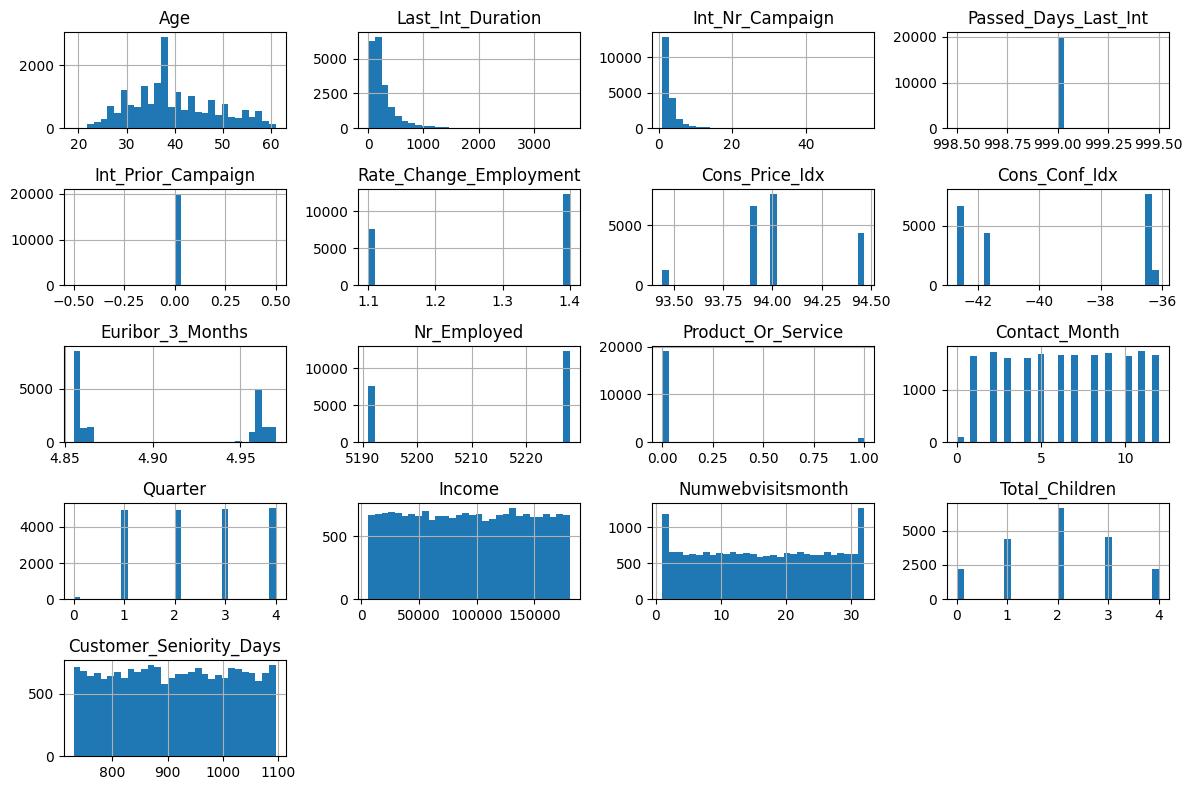

In [ ]:
#3.1. Distribución de variables numéricas
df_selected = df_inner.drop(['Date', 'Contact_Year', 'Customer_Seniority'], axis=1)
df_selected.hist(figsize=(12, 8), bins=30)
plt.xticks(rotation=45)
plt.tight_layout() # Ajustar automáticamente los elementos para que no se solapen los textos
plt.show()

#Para las columnas numéricas ponemos estos graficos menos en las columnas abajo mencionadas
#ya que no son muy representativas

### 3.2. Boxplots para detectar outliers

C:\Users\pooo_\AppData\Local\Temp\ipykernel_10224\724639773.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
C:\Users\pooo_\AppData\Local\Temp\ipykernel_10224\724639773.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
C:\Users\pooo_\AppData\Local\Temp\ipykernel_10224\724639773.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
C:\Users\pooo_\AppData\Local\Temp\ipykernel_10224\724639773.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(

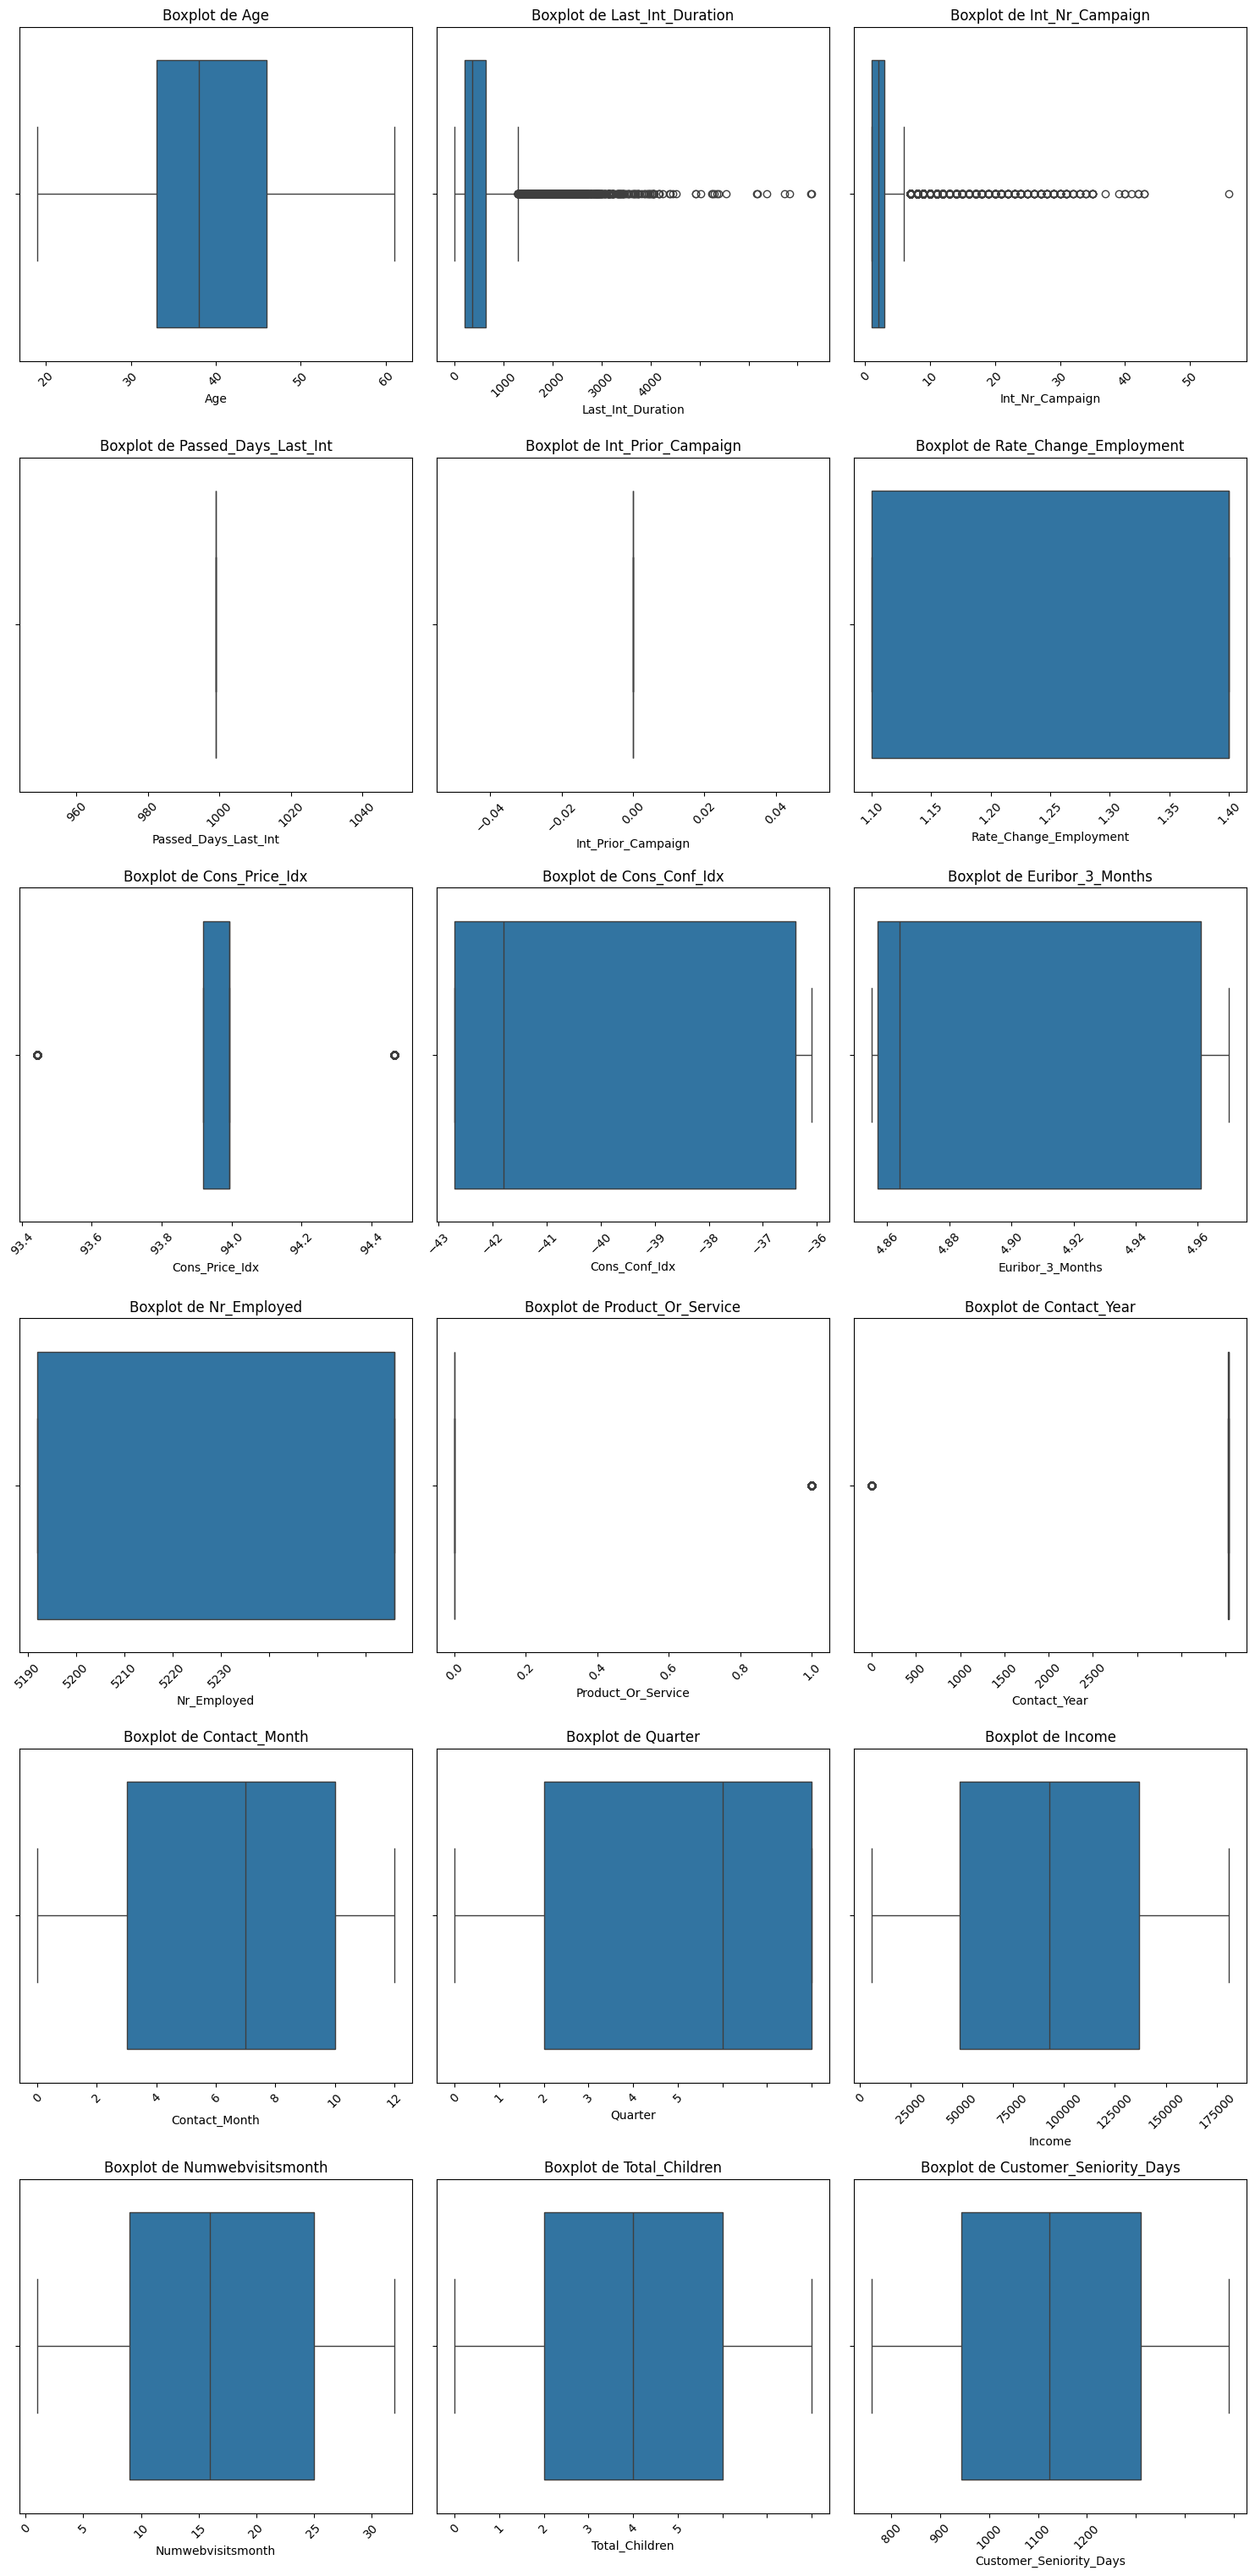

In [ ]:
# Boxplots - Para detectar outliers
num_cols = df_inner.select_dtypes(include=['number']).columns  # Selección de variables numéricas
fig, axes = plt.subplots(nrows=len(num_cols) // 3 + 1, ncols=3, figsize=(15, 5 * (len(num_cols) // 3 + 1)))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(data=df_inner, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot de {col}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

for j in range(i + 1, len(axes)):  # Ocultar gráficos vacíos
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
#Aquí vemos que el porcentaje de nulos de las columnas con nulos son bajos, que no existen columnas con nulos de mas del 10% de umbral. 
high_null_cols, low_null_cols = sp.calcular_solo_col_nul(df_inner)

,Column,Datatype,NullCount,Null%
0,Job,object,211,1.054051
1,Marital_Status,object,33,0.164852
2,Housing,object,521,2.602658
3,Loan,object,521,2.602658
4,Cons_Price_Idx,float64,194,0.969128
5,Date,datetime64[ns],109,0.544510
6,Contact_Day,object,109,0.544510


In [ ]:
print(df_inner['Age'].describe())

count    20018.000000
mean        39.662853
std          8.782432
min         19.000000
25%         33.000000
50%         38.000000
75%         46.000000
max         61.000000
Name: Age, dtype: float64


In [ ]:
df_inner['Age'].median()

In [550]:
print(df_inner['Cons_Price_Idx'].describe())

count    19824.000000
mean        94.035977
std          0.261120
min         93.444000
25%         93.918000
50%         93.994000
75%         93.994000
max         94.465000
Name: Cons_Price_Idx, dtype: float64


In [551]:
print(df_inner['Euribor_3_Months'].describe())

count    20018.000000
mean         4.903661
std          0.051618
min          4.855000
25%          4.857000
50%          4.864000
75%          4.961000
max          4.970000
Name: Euribor_3_Months, dtype: float64


In [552]:
print(df_inner['Contact_Month'].describe())

count    20018.000000
mean         6.495804
std          3.482513
min          0.000000
25%          3.000000
50%          7.000000
75%         10.000000
max         12.000000
Name: Contact_Month, dtype: float64


In [553]:
print(df_inner['Quarter'].describe())

count    20018.000000
mean         2.495254
std          1.131377
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          4.000000
Name: Quarter, dtype: float64


In [554]:
print(df_inner['Income'].describe())

count     20018.000000
mean      93071.656809
std       50615.701160
min        5852.000000
25%       49089.250000
50%       92973.500000
75%      136659.750000
max      180791.000000
Name: Income, dtype: float64


In [555]:
print(df_inner['Numwebvisitsmonth'].describe())

count    20018.000000
mean        16.537616
std          9.231910
min          1.000000
25%          9.000000
50%         16.000000
75%         25.000000
max         32.000000
Name: Numwebvisitsmonth, dtype: float64


In [556]:
print(df_inner['Total_Children'].describe())

count    20018.000000
mean         2.004196
std          1.154880
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: Total_Children, dtype: float64


In [557]:
print(df_inner['Customer_Seniority_Days'].describe())

count    20018.000000
mean       912.382106
std        105.699726
min        730.000000
25%        822.000000
50%        912.000000
75%       1005.000000
max       1095.000000
Name: Customer_Seniority_Days, dtype: float64


### 3.3. Gráficos de barras para variables categóricas

C:\Users\pooo_\AppData\Local\Temp\ipykernel_10224\2158261097.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha="right")
C:\Users\pooo_\AppData\Local\Temp\ipykernel_10224\2158261097.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha="right")
C:\Users\pooo_\AppData\Local\Temp\ipykernel_10224\2158261097.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha="right")
C:\Users\pooo_\AppData\Local\Temp\ipykernel_10224\2158261097.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or usin

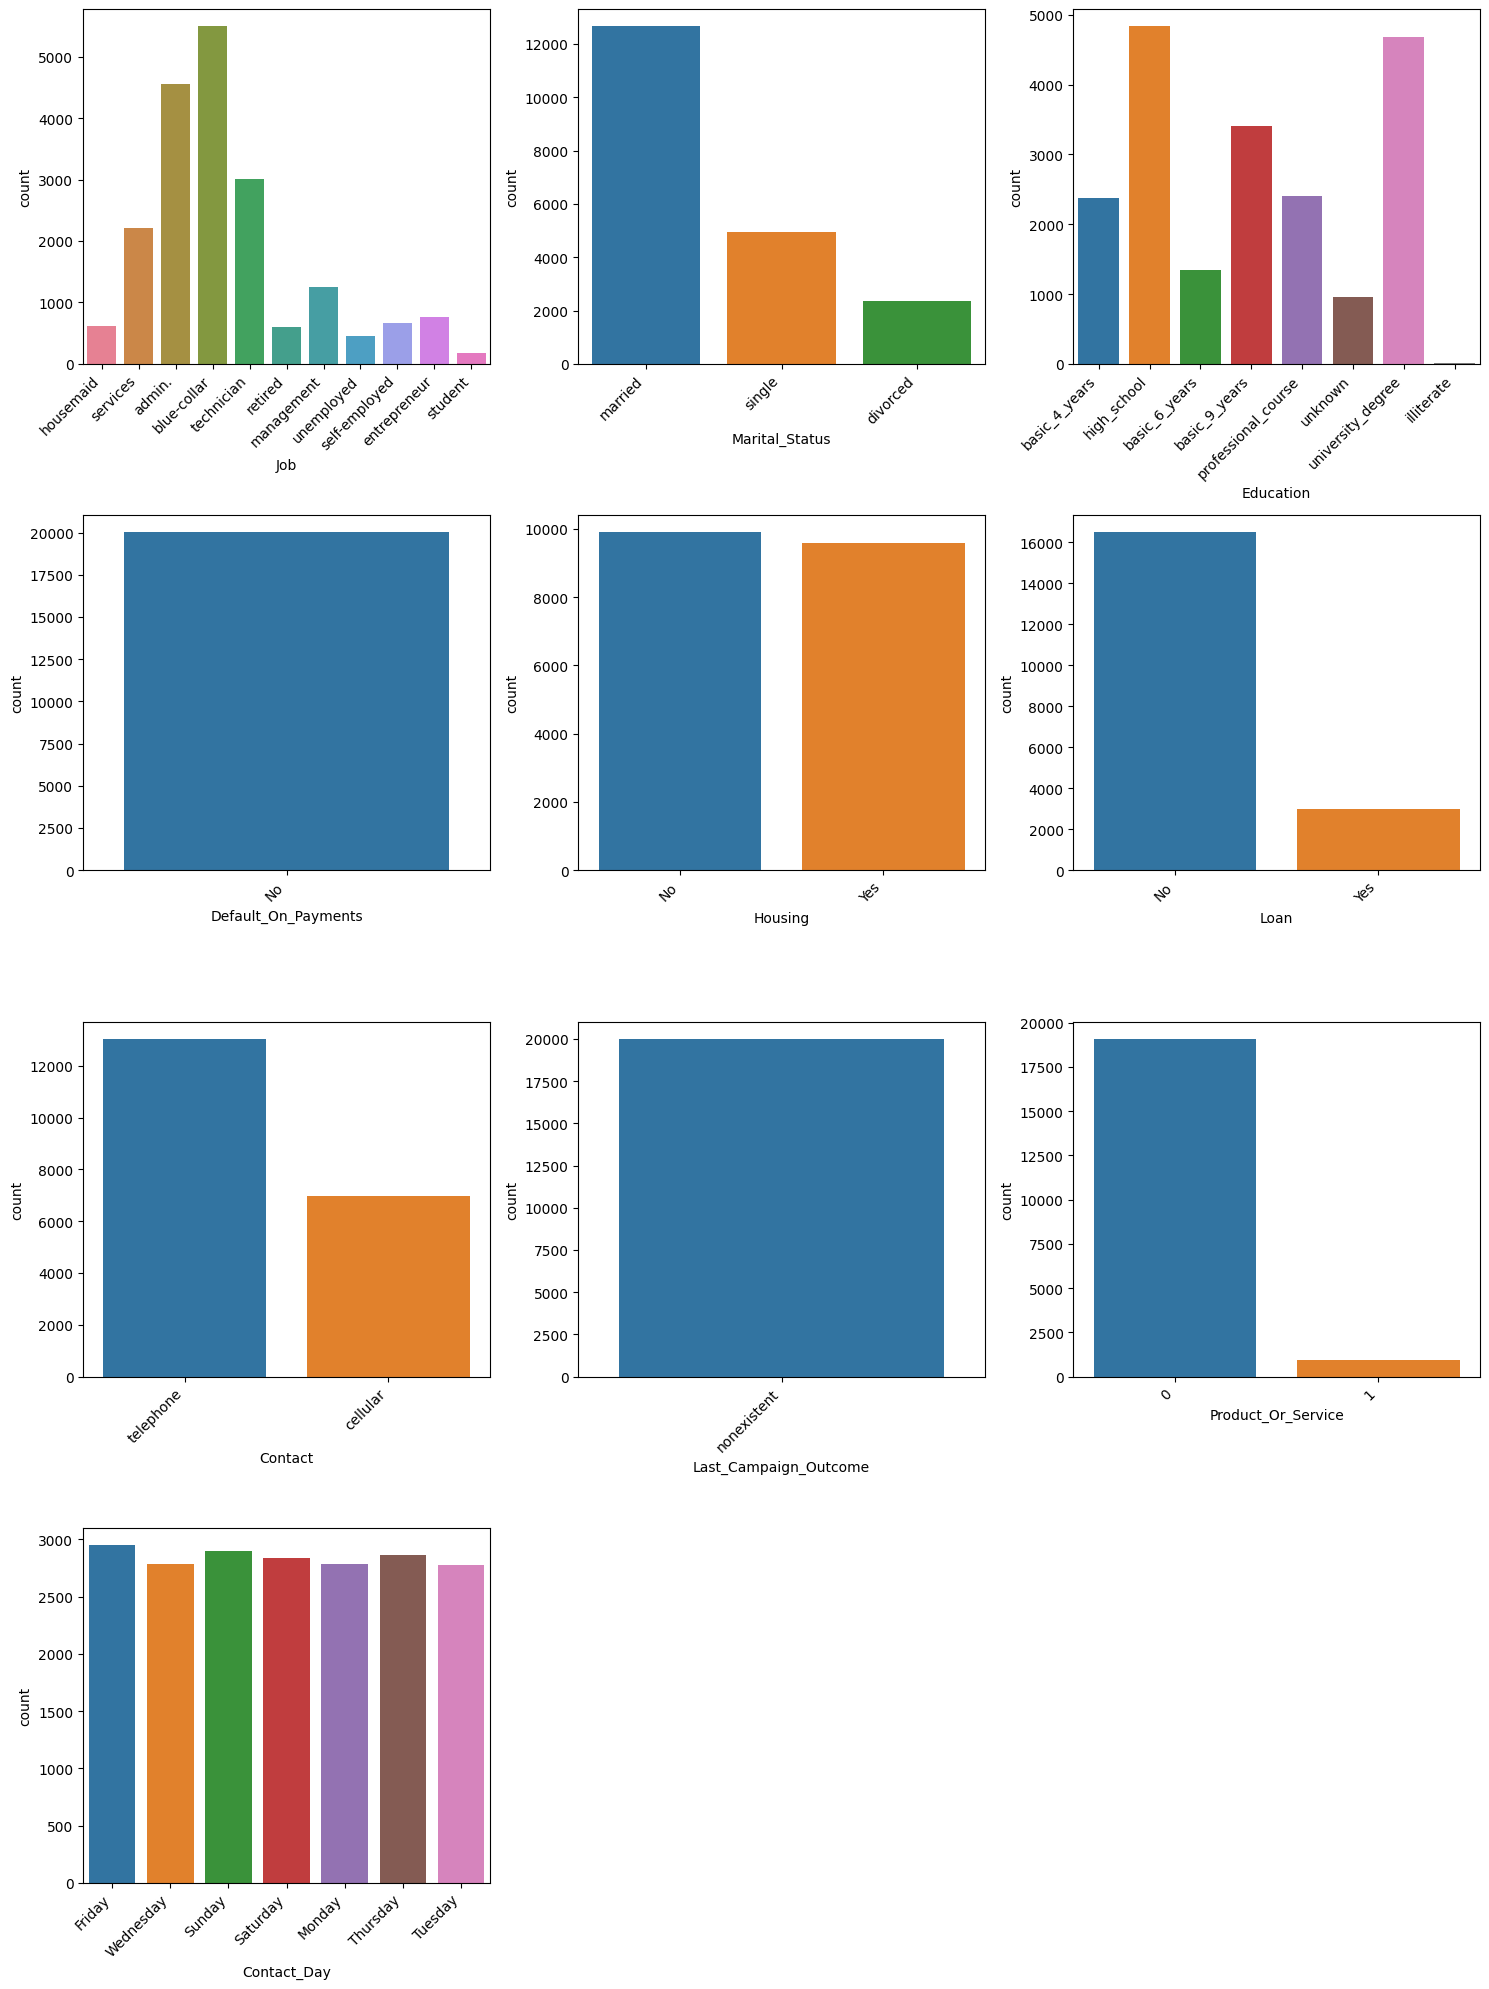

In [558]:
# Principales variables categóricas
categorical_columns = ['Job', 'Marital_Status', 'Education', 'Default_On_Payments', 'Housing', 'Loan',
                       'Contact', 'Last_Campaign_Outcome', 'Product_Or_Service', 'Contact_Day']

fig, axes = plt.subplots((len(categorical_columns) + 2) // 3, 3, figsize=(15, 5 * ((len(categorical_columns) + 2) // 3)))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(data=df_inner, x=col, ax=axes[i], hue=col, legend=False)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha="right")

for j in range(i + 1, len(axes)):  # Ocultar gráficos vacíos
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


C:\Users\pooo_\AppData\Local\Temp\ipykernel_10224\2626018056.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(data=df_inner, x=df_inner['Product_Or_Service'].replace({0:'no',1:'yes'}), palette=['salmon','skyblue'])


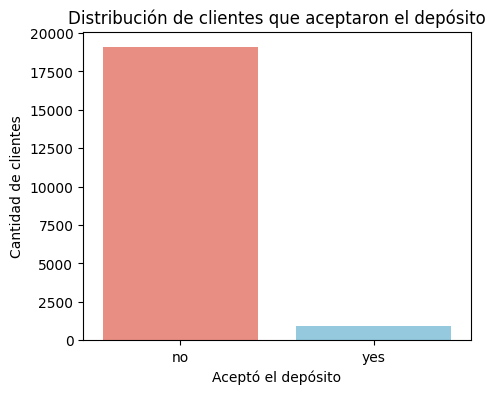

Porcentaje de aceptación:4.59%


In [ ]:
#Clientes aceptaron el depósito a plazo
plt.figure(figsize=(5, 4)) 

ax1 = sns.countplot(data=df_inner, x=df_inner['Product_Or_Service'].replace({0:'no',1:'yes'}), palette=['salmon','skyblue'])
ax1.set_title('Distribución de clientes que aceptaron el depósito')
ax1.set_xlabel('Aceptó el depósito')
ax1.set_ylabel('Cantidad de clientes')

plt.show(ax1)

#Calculo la media de aceptación del depósito
acceptance_rate = df_inner['Product_Or_Service'].mean()*100
print(f'Porcentaje de aceptación:{acceptance_rate:.2f}%')

C:\Users\pooo_\AppData\Local\Temp\ipykernel_10224\2943228388.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.boxplot(data=df_inner, x=df_inner['Product_Or_Service'].replace({0:'no',1:'yes'}), y="Age", palette=['salmon','skyblue'])


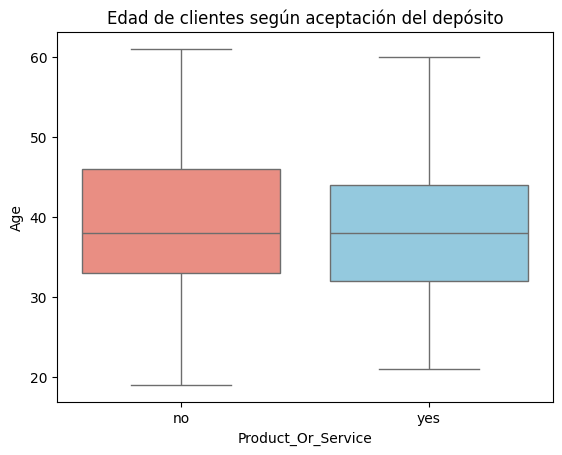

C:\Users\pooo_\AppData\Local\Temp\ipykernel_10224\2943228388.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax3 = sns.barplot(data=df_inner, x="Job", y='Product_Or_Service', estimator=lambda x: sum(x) / len(x), palette=['salmon','skyblue'], ci=None)
C:\Users\pooo_\AppData\Local\Temp\ipykernel_10224\2943228388.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax3 = sns.barplot(data=df_inner, x="Job", y='Product_Or_Service', estimator=lambda x: sum(x) / len(x), palette=['salmon','skyblue'], ci=None)
C:\Users\pooo_\AppData\Local\Temp\ipykernel_10224\2943228388.py:9: UserWarning: 
The palette list has fewer values (2) than needed (11) and will cycle, which may produce an uninterpretable plot.
  ax3 = sns.barplot(data=df_inner, x="Job", y='Product_Or_Service', estimator=lambda x: sum(x) / len(x), pa

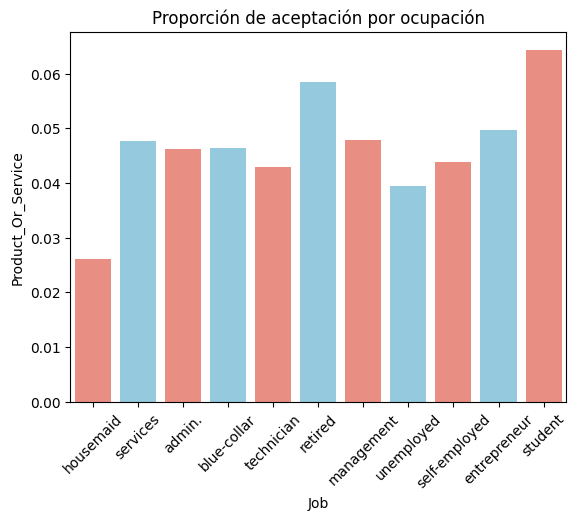

C:\Users\pooo_\AppData\Local\Temp\ipykernel_10224\2943228388.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax4 = sns.barplot(data=df_inner, x="Education", y="Product_Or_Service", estimator=lambda x: sum(x) / len(x), palette=['salmon','skyblue'], ci=None)
C:\Users\pooo_\AppData\Local\Temp\ipykernel_10224\2943228388.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax4 = sns.barplot(data=df_inner, x="Education", y="Product_Or_Service", estimator=lambda x: sum(x) / len(x), palette=['salmon','skyblue'], ci=None)
C:\Users\pooo_\AppData\Local\Temp\ipykernel_10224\2943228388.py:15: UserWarning: 
The palette list has fewer values (2) than needed (8) and will cycle, which may produce an uninterpretable plot.
  ax4 = sns.barplot(data=df_inner, x="Education", y="Product_Or_Service", estimator=lambda x:

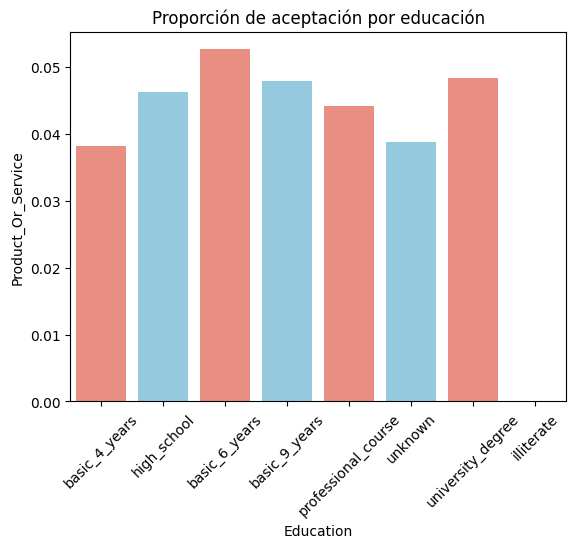

In [ ]:
# Clientes más propensos a aceptar la oferta según:

# Edad vs. Suscripción
ax2 = sns.boxplot(data=df_inner, x=df_inner['Product_Or_Service'].replace({0:'no',1:'yes'}), y="Age", palette=['salmon','skyblue'])
ax2.set_title('Edad de clientes según aceptación del depósito')
plt.show()  

# Trabajo vs. Suscripción
ax3 = sns.barplot(data=df_inner, x="Job", y='Product_Or_Service', estimator=lambda x: sum(x) / len(x), palette=['salmon','skyblue'], ci=None)
ax3.set_title('Proporción de aceptación por ocupación')
plt.xticks(rotation=45)  # Rotar etiquetas en el eje X
plt.show()  

# Nivel educativo vs. Suscripción
ax4 = sns.barplot(data=df_inner, x="Education", y="Product_Or_Service", estimator=lambda x: sum(x) / len(x), palette=['salmon','skyblue'], ci=None)
ax4.set_title('Proporción de aceptación por educación')
plt.xticks(rotation=45)  # Rotar etiquetas en el eje X
plt.show() 

C:\Users\pooo_\AppData\Local\Temp\ipykernel_10224\1549423646.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax5 =  sns.boxplot(data=df_inner, x=df_inner['Product_Or_Service'].replace({0:'no',1:'yes'}), y="Last_Int_Duration", palette=['salmon','skyblue'])


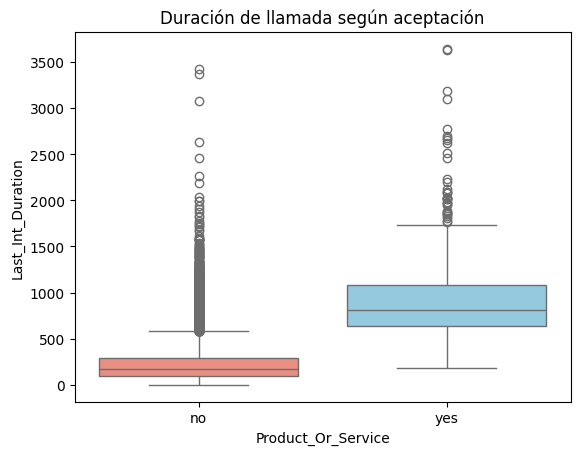

C:\Users\pooo_\AppData\Local\Temp\ipykernel_10224\1549423646.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax6 = sns.boxplot(data=df_bank, x="Product_Or_Service", y="Int_Nr_Campaign", palette=['salmon','skyblue'])


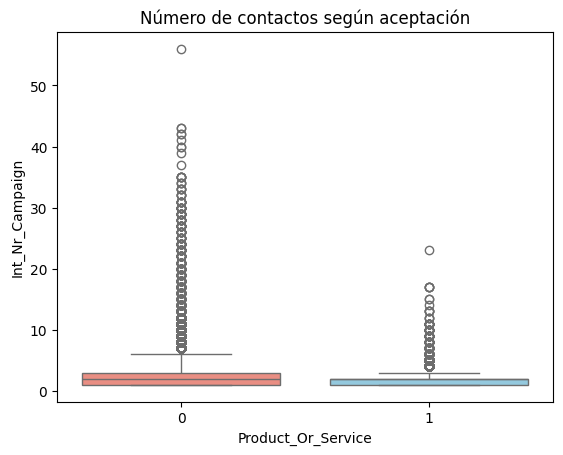

In [ ]:
# Llamadas necesarias para convencer a los clientes

# Duración de la llamada vs. Conversión
ax5 =  sns.boxplot(data=df_inner, x=df_inner['Product_Or_Service'].replace({0:'no',1:'yes'}), y="Last_Int_Duration", palette=['salmon','skyblue'])
ax5.set_title('Duración de llamada según aceptación')
plt.show()

#Número de intentos vs. Conversión
ax6 = sns.boxplot(data=df_bank, x="Product_Or_Service", y="Int_Nr_Campaign", palette=['salmon','skyblue'])
ax6.set_title('Número de contactos según aceptación')
plt.show()

C:\Users\pooo_\AppData\Local\Temp\ipykernel_10224\3975331002.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax7 = sns.barplot(data=df_inner, x="Contact_Month", y="Product_Or_Service", estimator=lambda x: sum(x) / len(x), palette=['skyblue','salmon'], ci=None )
C:\Users\pooo_\AppData\Local\Temp\ipykernel_10224\3975331002.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax7 = sns.barplot(data=df_inner, x="Contact_Month", y="Product_Or_Service", estimator=lambda x: sum(x) / len(x), palette=['skyblue','salmon'], ci=None )
C:\Users\pooo_\AppData\Local\Temp\ipykernel_10224\3975331002.py:7: UserWarning: 
The palette list has fewer values (2) than needed (13) and will cycle, which may produce an uninterpretable plot.
  ax7 = sns.barplot(data=df_inner, x="Contact_Month", y="Product_Or_Service", estimat

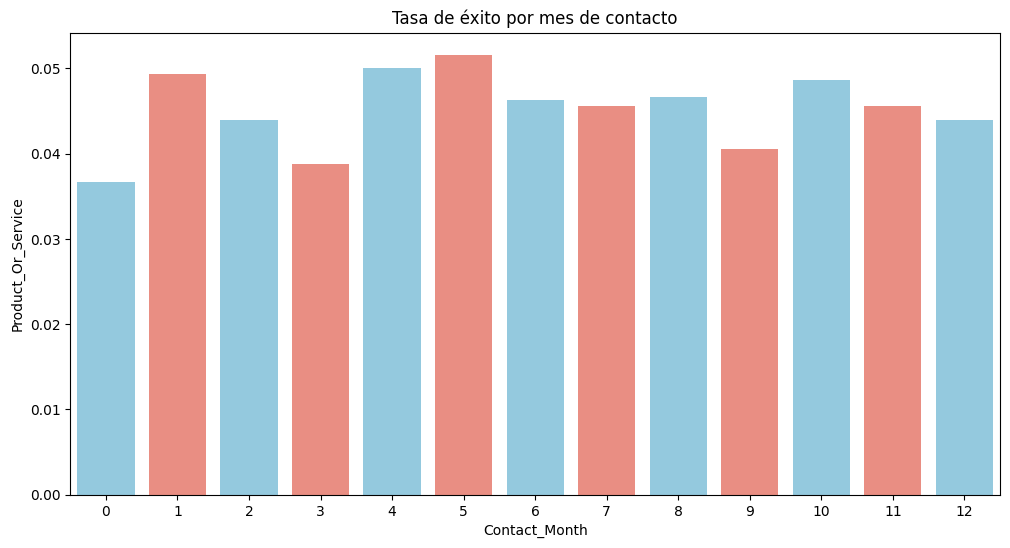

C:\Users\pooo_\AppData\Local\Temp\ipykernel_10224\3975331002.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax8 = sns.scatterplot(data=df_inner, x="Rate_Change_Employment", y="Product_Or_Service",palette=['skyblue','salmon'], alpha=0.5)


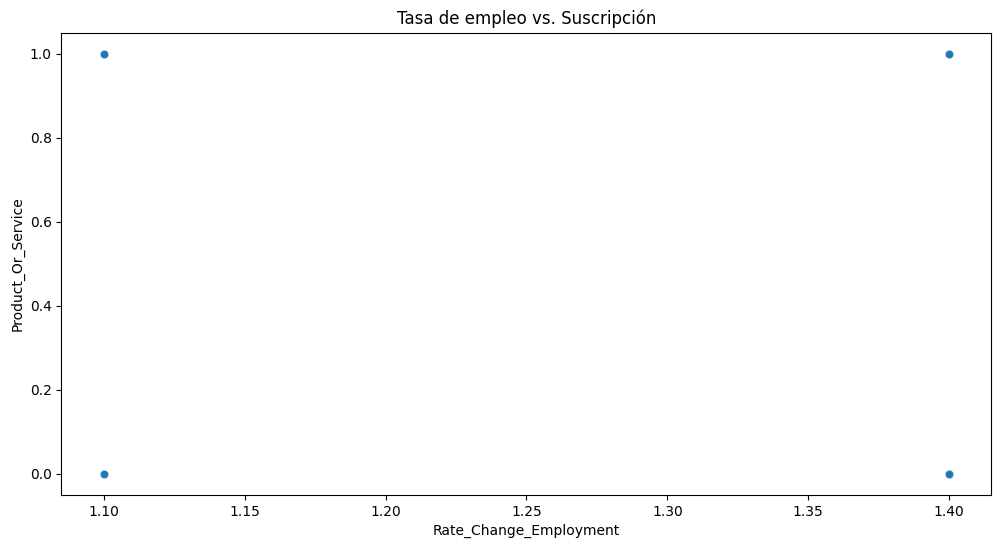

In [ ]:
#Condiciones económicas que pueden favorecer a aceptar la decisión

# Ajustar el tamaño de la figura para ax7
plt.figure(figsize=(12, 6))  # Puedes cambiar el tamaño a tu preferencia

# Mes de la campaña vs. Tasa de éxito
ax7 = sns.barplot(data=df_inner, x="Contact_Month", y="Product_Or_Service", estimator=lambda x: sum(x) / len(x), palette=['skyblue','salmon'], ci=None )
ax7.set_title('Tasa de éxito por mes de contacto')

# Mostrar el gráfico
plt.show()

In [ ]:
# Ajustar el tamaño de la figura para ax8 (si lo deseas)
plt.figure(figsize=(12, 6))  # También puedes ajustar el tamaño para ax8

# Tasa de empleo vs. Conversión
ax8 = sns.scatterplot(data=df_inner, x="Rate_Change_Employment", y="Product_Or_Service",palette=['skyblue','salmon'], alpha=0.5)
ax8.set_title("Tasa de empleo vs. Suscripción")

# Mostrar el gráfico
plt.show()

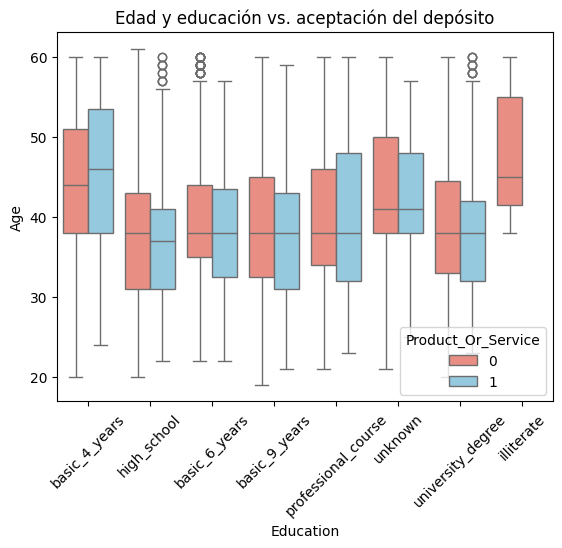

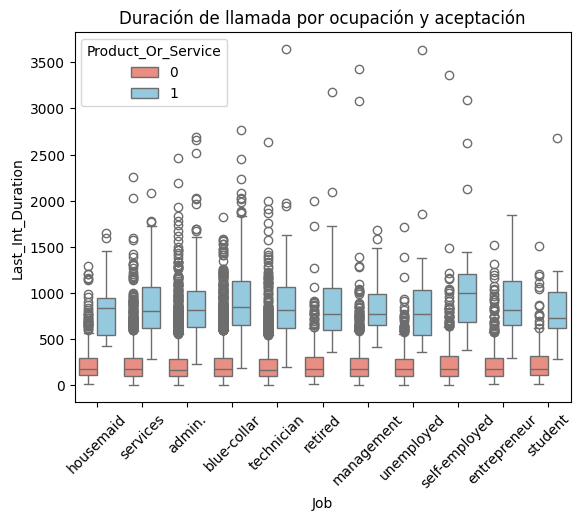

In [ ]:
# Analizar la interacción entre edad y educación
ax9= sns.boxplot(data=df_inner, x="Education", y="Age", hue="Product_Or_Service", palette=['salmon','skyblue'])
plt.xticks(rotation=45)
ax9.set_title("Edad y educación vs. aceptación del depósito")
plt.show()


In [ ]:
# Analizar la llamada en diferentes grupos de clientes según el tipo de trabajos
ax10 = sns.boxplot(data=df_inner, x="Job", y="Last_Int_Duration", hue="Product_Or_Service", palette=['salmon','skyblue'])
plt.xticks(rotation=45)
ax10.set_title("Duración de llamada por ocupación y aceptación")
plt.show() 

### 3.4. Heatmap de correlaciones

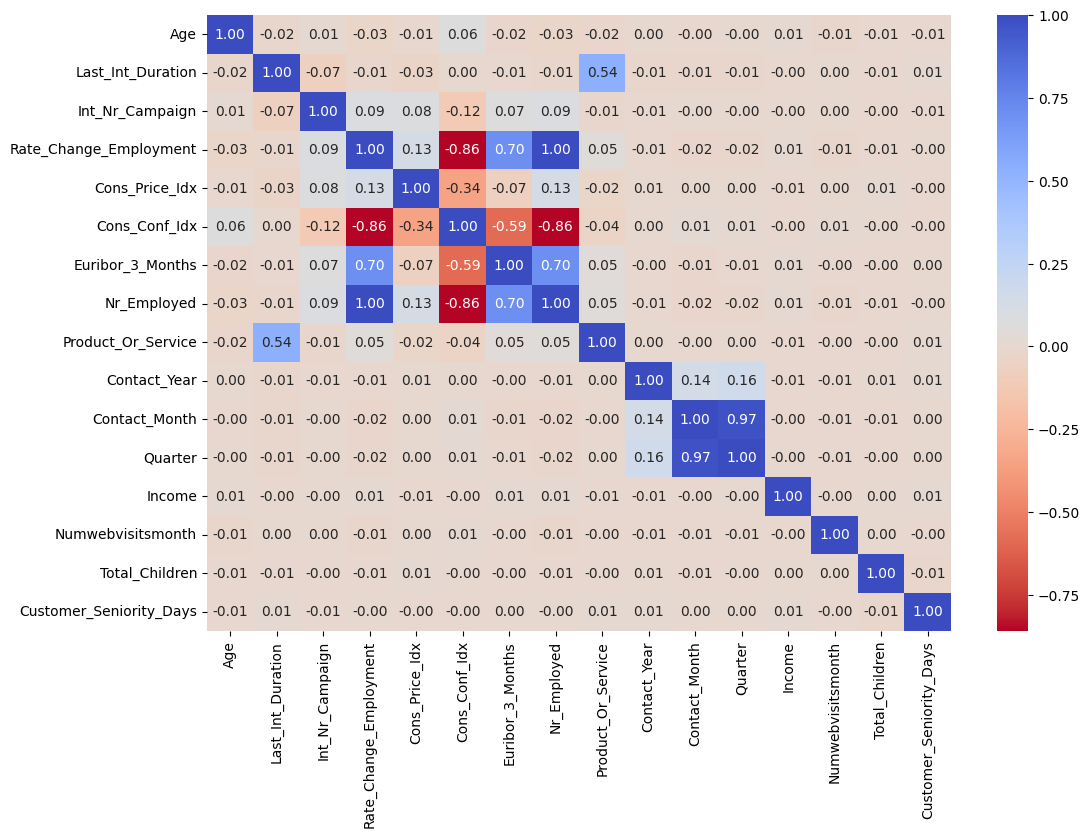

In [565]:
# Heatmap de correlaciones sin las columnas 'Passed_Days_Last_Int' y 'Int_Prior_Campaign' ya que no son representativas para el analisis
plt.figure(figsize=(12, 8))
corr_matrix = df_inner.drop(columns=['Passed_Days_Last_Int', 'Int_Prior_Campaign']).select_dtypes(include='number').corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm_r", fmt=".2f")
# Invertimos la escala de colores con 'coolwarm_r', para poner altos valores en azul y bajos en rojo
plt.show()


# 4. Guardar archivos limpios

In [ ]:
#Guardar la tabla df_bank
df_bank.to_csv(r"data\datos_transformados\campana_marketing_banco_limpio.csv", index = False)

In [ ]:
# Guardar la tabla de clientes
df_customer.to_csv(r"data\datos_transformados\customer_details_limpio.csv", index = False)

In [ ]:
# Guardar la tabla unida de datos del banco y sus clientes
df_inner.to_csv(r"data\datos_transformados\bank_customers_limpio.csv", index = False)